The 127 Ag atoms are separated by 7.96774226428242e+21 m
The 129 Ag atoms are separated by 7.844251744150692e+21 m
The Ag atoms are separated by 9.369450017366565e+21 m


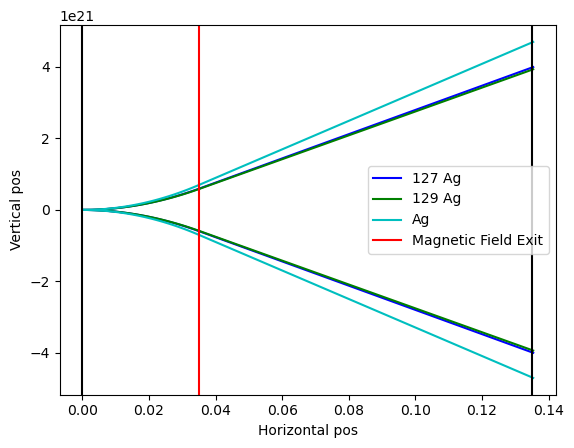

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.constants as c

m_Ag = 1.7934e-25 # mass of Ag
k = (math.sqrt(m_Ag) * 450) # arbitrary proportionality constant

hbar = c.h / (2*c.pi) # planck's constant, h, divided by 2*pi
m_electron = c.electron_mass # mass of an electron in kilograms (this variable shouldn't change)
q = -c.e # charge of an electron in C
g = 2
S_z = {'up':hbar/2, 'down':-hbar/2} # spin up and spin down

l_SGA = 0.035 # length of SGA in meters
l_d = 0.1 # length from SGA to detector in meters
dB_dz = -800 # magnetic field gradient in Tesla / meter

colors = ['b', 'g', 'c', 'm', 'y']

def SGA_motion(x, vx, a):
    return (1/2) * a * (x/vx)**2

def detector_motion(x, vx, vy, sep):
    return vy * (x/vx) - sep

def stern_gerlach(atoms):
    i = 0
    atomLabelled = False
    for atom_name in atoms:
        for spin in S_z:
            mu_z = g * (q / (2*m_electron)) * S_z[spin] # magnetic moment of the atoms
            F_z = mu_z * dB_dz # force in the z axis relative to the magnetic field direction, in Newtons
            
            atom_acceleration = F_z / (atoms[atom_name])
            initial_velocity = k #/math.sqrt(atoms[atom_name])

            # Motion through the SGA
            x_range = np.arange(0, 1.01 * l_SGA, l_SGA/100)
            plt.plot(x_range, SGA_motion(x_range, initial_velocity, atom_acceleration), color=colors[i])

            final_velocity = atom_acceleration * (l_SGA / initial_velocity)
            separation_distance = (1/2) * atom_acceleration * (l_SGA / initial_velocity)**2

            if atomLabelled:
                label_name = ''
            else:
                label_name = atom_name

            # Motion from the SGA to the detector
            x_range = np.arange((1.01 * l_SGA), l_SGA + (1.01 * l_d), l_d/100)
            plt.plot(x_range, detector_motion(x_range, initial_velocity, final_velocity, separation_distance), color=colors[i], label=label_name)
            atomLabelled = True
        i += 1
        if i > len(colors):
            i = 0
        atomLabelled = False
        print("The {} atoms are separated by {} m".format(atom_name, 2*abs(detector_motion(l_SGA + l_d, initial_velocity, final_velocity, separation_distance))))
    
    plt.axvline(x = l_SGA, color='r', label='Magnetic Field Exit')
    plt.axvline(x = l_SGA + l_d, color='k')
    plt.axvline(x = 0, color='k')
    plt.legend()

m_127Ag = 2.1089e-25
m_129Ag = 2.1421e-25

atoms = {"127 Ag": m_127Ag, "129 Ag": m_129Ag, "Ag": m_Ag}

stern_gerlach(atoms)

plt.xlabel("Horizontal pos")
plt.ylabel("Vertical pos")
plt.legend()
plt.show()